# Fundamentals-Assessment

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
#look at first five rows of data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#look at first five rows of total bill column
tips["total_bill"]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
5      25.29
6       8.77
7      26.88
8      15.04
9      14.78
10     10.27
11     35.26
12     15.42
13     18.43
14     14.83
15     21.58
16     10.33
17     16.29
18     16.97
19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
24     19.82
25     17.81
26     13.37
27     12.69
28     21.70
29     19.65
       ...  
214    28.17
215    12.90
216    28.15
217    11.59
218     7.74
219    30.14
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
227    20.45
228    13.28
229    22.12
230    24.01
231    15.69
232    11.61
233    10.77
234    15.53
235    10.07
236    12.60
237    32.83
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [7]:
tips["total_bill"].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [8]:
#find the mean of the tips column
tips["tip"].mean()

2.9982786885245902

In [10]:
#groups the dataset by the sex column
group = tips.groupby("sex")

In [11]:
group.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [12]:
group.first()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,10.34,1.66,No,Sun,Dinner,3
Female,16.99,1.01,No,Sun,Dinner,2


In [13]:
smoker = tips.groupby("smoker")

In [14]:
smoker.first()

,total_bill,tip,sex,day,time,size
smoker,,,,,,
Yes,38.01,3.00,Male,Sat,Dinner,4
No,16.99,1.01,Female,Sun,Dinner,2


In [15]:
group.last()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,17.82,1.75,No,Sat,Dinner,2
Female,18.78,3.00,No,Thur,Dinner,2


In [16]:
group.sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [17]:
group.mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


C:\Users\pdaly5\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


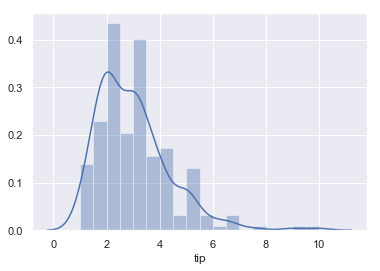

In [18]:
sns.distplot(tips["tip"])